In [1]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Use glob() to list all files

In [2]:
filenames = glob("*.xlsx")
print('File names: ',filenames)


File names:  ['NewData.xlsx']


In [4]:
data = pd.concat([pd.read_excel(file) for file in filenames])
data.shape

(19877, 12)

In [5]:
data.columns


Index(['Unnamed: 0', 'NAME', 'GENDER', 'YEAR', 'STREAM', 'RESULT', 'ENG',
       'DZO', 'PHY', 'CHE', 'MATH', 'BIO'],
      dtype='object')

In [8]:
df=data[['NAME', 'GENDER','YEAR','STREAM','RESULT','ENG','DZO','PHY','CHE','MATH','BIO']]
df.head()

,NAME,GENDER,YEAR,STREAM,RESULT,ENG,DZO,PHY,CHE,MATH,BIO
0,BHUDHIMAN KAMI,M,2012,SCIENCE,PCA,55.0,58.0,48.0,55.0,30.0,46.0
1,GALEY ZANGPO,M,2012,SCIENCE,PCA,55.0,60.0,44.0,62.0,40.0,50.0
2,JAMYANG LHENDUP GAYLLEY,M,2012,SCIENCE,PCA,69.0,55.0,74.0,74.0,60.0,62.0
3,JIGME SAMDRUP,M,2012,SCIENCE,PCA,58.0,48.0,55.0,72.0,74.0,NaN
4,KARMA GYELTSHEN,M,2012,SCIENCE,PCA,64.0,58.0,55.0,60.0,60.0,34.0


In [31]:
df.drop(['NAME'],axis = 1, inplace = True)

In [32]:
df.YEAR.astype(int)

0        2012
1        2012
2        2012
3        2012
4        2012
         ... 
19872    2018
19873    2018
19874    2018
19875    2018
19876    2018
Name: YEAR, Length: 19877, dtype: int32

In [33]:
df.dtypes

GENDER     object
YEAR        int64
STREAM     object
RESULT     object
ENG       float64
DZO       float64
PHY       float64
CHE       float64
MATH      float64
BIO       float64
dtype: object

In [34]:
df = df.groupby('STREAM')

In [35]:
df = df.get_group('SCIENCE')
df.shape

(19877, 10)

In [36]:
df.head()

,GENDER,YEAR,STREAM,RESULT,ENG,DZO,PHY,CHE,MATH,BIO
0,M,2012,SCIENCE,PCA,55.0,58.0,48.0,55.0,30.0,46.0
1,M,2012,SCIENCE,PCA,55.0,60.0,44.0,62.0,40.0,50.0
2,M,2012,SCIENCE,PCA,69.0,55.0,74.0,74.0,60.0,62.0
3,M,2012,SCIENCE,PCA,58.0,48.0,55.0,72.0,74.0,NaN
4,M,2012,SCIENCE,PCA,64.0,58.0,55.0,60.0,60.0,34.0


Renaming the columns

Dropping the extra columns

In [420]:
df.replace(0,np.nan,inplace=True)
df

,NAME,GENDER,YEAR,STREAM,RESULT,ENG,DZO,PHY,CHE,MATH,BIO
0,NGAWANG TENZIN,M,2018,SCIENCE,PCA,66.0,57.0,55.0,42.0,43.0,49.0
1,SONAM LODAY CHEYNOR,M,2018,SCIENCE,PCA,74.0,57.0,64.0,49.0,40.0,49.0
2,SRAWAN PRADHAN,M,2018,SCIENCE,PCA,75.0,57.0,86.0,64.0,91.0,NaN
3,TANDIN TSHEWANG,M,2018,SCIENCE,PCA,45.0,42.0,44.0,37.0,43.0,NaN
4,TASHI TOBGAY,M,2018,SCIENCE,PCA,57.0,62.0,59.0,41.0,50.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...
10044,SONAM WANGMO,F,2017,SCIENCE,PCA,64.0,78.0,49.0,53.0,33.0,50.0
10045,TSHERING DENDUP,M,2017,SCIENCE,PCA,64.0,67.0,63.0,62.0,58.0,NaN
10046,KARMA YANGZOM,F,2017,SCIENCE,PCA,60.0,71.0,62.0,63.0,30.0,58.0
10047,KUENZANG DORJI,M,2017,SCIENCE,PCA,40.0,52.0,46.0,42.0,25.0,NaN


In [39]:
# bio bukhan

bio_df = df.drop(['MATH'], axis = 1)

In [40]:

bio_df

,GENDER,YEAR,STREAM,RESULT,ENG,DZO,PHY,CHE,BIO
0,M,2012,SCIENCE,PCA,55.0,58.0,48.0,55.0,46.0
1,M,2012,SCIENCE,PCA,55.0,60.0,44.0,62.0,50.0
2,M,2012,SCIENCE,PCA,69.0,55.0,74.0,74.0,62.0
3,M,2012,SCIENCE,PCA,58.0,48.0,55.0,72.0,NaN
4,M,2012,SCIENCE,PCA,64.0,58.0,55.0,60.0,34.0
...,...,...,...,...,...,...,...,...,...
19872,M,2018,SCIENCE,PCA,57.0,48.0,76.0,70.0,0.0
19873,M,2018,SCIENCE,PCA,45.0,40.0,45.0,44.0,0.0
19874,M,2018,SCIENCE,PCA,51.0,45.0,66.0,55.0,0.0
19875,M,2018,SCIENCE,PCA,58.0,74.0,55.0,69.0,0.0


In [42]:
#math bukahan
math_df = df.drop(['BIO'], axis = 1)
math_df

,GENDER,YEAR,STREAM,RESULT,ENG,DZO,PHY,CHE,MATH
0,M,2012,SCIENCE,PCA,55.0,58.0,48.0,55.0,30.0
1,M,2012,SCIENCE,PCA,55.0,60.0,44.0,62.0,40.0
2,M,2012,SCIENCE,PCA,69.0,55.0,74.0,74.0,60.0
3,M,2012,SCIENCE,PCA,58.0,48.0,55.0,72.0,74.0
4,M,2012,SCIENCE,PCA,64.0,58.0,55.0,60.0,60.0
...,...,...,...,...,...,...,...,...,...
19872,M,2018,SCIENCE,PCA,57.0,48.0,76.0,70.0,92.0
19873,M,2018,SCIENCE,PCA,45.0,40.0,45.0,44.0,59.0
19874,M,2018,SCIENCE,PCA,51.0,45.0,66.0,55.0,57.0
19875,M,2018,SCIENCE,PCA,58.0,74.0,55.0,69.0,77.0


In [43]:
df.head()

,GENDER,YEAR,STREAM,RESULT,ENG,DZO,PHY,CHE,MATH,BIO
0,M,2012,SCIENCE,PCA,55.0,58.0,48.0,55.0,30.0,46.0
1,M,2012,SCIENCE,PCA,55.0,60.0,44.0,62.0,40.0,50.0
2,M,2012,SCIENCE,PCA,69.0,55.0,74.0,74.0,60.0,62.0
3,M,2012,SCIENCE,PCA,58.0,48.0,55.0,72.0,74.0,NaN
4,M,2012,SCIENCE,PCA,64.0,58.0,55.0,60.0,60.0,34.0


In [46]:
df.isna().sum()

GENDER       0
YEAR         0
STREAM       0
RESULT      14
ENG         50
DZO         50
PHY         50
CHE         50
MATH        50
BIO       4552
dtype: int64

In [66]:
# removing na value in bio and math

bio_math = df.dropna(subset=['BIO','MATH'])

In [67]:
bio_math.isnull().sum()

GENDER     0
YEAR       0
STREAM     0
RESULT    14
ENG        0
DZO        0
PHY        0
CHE        0
MATH       0
BIO        0
dtype: int64

In [68]:
bio_math.head().

,GENDER,YEAR,STREAM,RESULT,ENG,DZO,PHY,CHE,MATH,BIO
0,M,2012,SCIENCE,PCA,55.0,58.0,48.0,55.0,30.0,46.0
1,M,2012,SCIENCE,PCA,55.0,60.0,44.0,62.0,40.0,50.0
2,M,2012,SCIENCE,PCA,69.0,55.0,74.0,74.0,60.0,62.0
4,M,2012,SCIENCE,PCA,64.0,58.0,55.0,60.0,60.0,34.0
6,M,2012,SCIENCE,PCA,44.0,58.0,50.0,66.0,40.0,44.0


In [83]:
bio_math.shape

(15325, 10)

In [95]:
# math bukhan ba ka data cleaning 
# do for other 

In [96]:
math_df.mean()

C:\Users\GYELTS~2\AppData\Local\Temp/ipykernel_1500/1348538243.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  math_df.mean()


YEAR    2015.669536
ENG       56.234124
DZO       60.401661
PHY       56.040386
CHE       55.343921
MATH      58.666560
dtype: float64

In [70]:
math_df.median()

C:\Users\GYELTS~2\AppData\Local\Temp/ipykernel_1500/1706149284.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  math_df.median()


YEAR    2016.0
ENG       57.0
DZO       62.0
PHY       56.0
CHE       55.0
MATH      60.0
dtype: float64

In [80]:
math_df[['ENG','DZO','PHY','CHE','MATH']] =math_df[['ENG','DZO','PHY','CHE','MATH']].fillna(math_df[['ENG','DZO','PHY','CHE','MATH']].mean())

In [81]:
math_df.isna().sum()

GENDER     0
YEAR       0
STREAM     0
RESULT    14
ENG        0
DZO        0
PHY        0
CHE        0
MATH       0
dtype: int64

In [82]:
math_df.mean()

C:\Users\GYELTS~2\AppData\Local\Temp/ipykernel_1500/1348538243.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  math_df.mean()


YEAR    2015.669769
ENG       56.227922
DZO       60.383669
PHY       56.023655
CHE       55.326020
MATH      58.637666
dtype: float64

In [93]:
math_df.dropna(inplace=True)

In [94]:
math_df.isna().sum()

GENDER    0
YEAR      0
STREAM    0
RESULT    0
ENG       0
DZO       0
PHY       0
CHE       0
MATH      0
dtype: int64

In [97]:
math_df.corr()

,YEAR,ENG,DZO,PHY,CHE,MATH
YEAR,1.000000,0.183502,0.095567,0.228115,-0.025172,0.049485
ENG,0.183502,1.000000,0.594014,0.598042,0.598683,0.481965
DZO,0.095567,0.594014,1.000000,0.524065,0.552828,0.481505
PHY,0.228115,0.598042,0.524065,1.000000,0.797075,0.730506
CHE,-0.025172,0.598683,0.552828,0.797075,1.000000,0.740472
MATH,0.049485,0.481965,0.481505,0.730506,0.740472,1.000000


In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

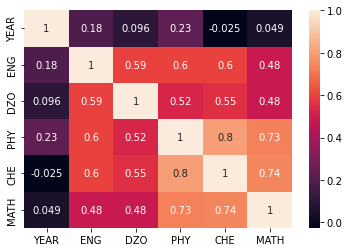

In [106]:
sns.heatmap(math_df.corr(), annot= True)

In [107]:
import sklearn

In [108]:
math_df.head()

,GENDER,YEAR,STREAM,RESULT,ENG,DZO,PHY,CHE,MATH
0,M,2012,SCIENCE,PCA,55.0,58.0,48.0,55.0,30.0
1,M,2012,SCIENCE,PCA,55.0,60.0,44.0,62.0,40.0
2,M,2012,SCIENCE,PCA,69.0,55.0,74.0,74.0,60.0
3,M,2012,SCIENCE,PCA,58.0,48.0,55.0,72.0,74.0
4,M,2012,SCIENCE,PCA,64.0,58.0,55.0,60.0,60.0


In [ ]:
# spliting data for training and testing

In [180]:
x = math_df.drop(['RESULT','GENDER','YEAR','STREAM'],axis = 1)
x

,ENG,DZO,PHY,CHE,MATH
0,55.0,58.0,48.0,55.0,30.0
1,55.0,60.0,44.0,62.0,40.0
2,69.0,55.0,74.0,74.0,60.0
3,58.0,48.0,55.0,72.0,74.0
4,64.0,58.0,55.0,60.0,60.0
...,...,...,...,...,...
19872,57.0,48.0,76.0,70.0,92.0
19873,45.0,40.0,45.0,44.0,59.0
19874,51.0,45.0,66.0,55.0,57.0
19875,58.0,74.0,55.0,69.0,77.0


In [181]:
math_df.head()

,GENDER,YEAR,STREAM,RESULT,ENG,DZO,PHY,CHE,MATH
0,M,2012,SCIENCE,PCA,55.0,58.0,48.0,55.0,30.0
1,M,2012,SCIENCE,PCA,55.0,60.0,44.0,62.0,40.0
2,M,2012,SCIENCE,PCA,69.0,55.0,74.0,74.0,60.0
3,M,2012,SCIENCE,PCA,58.0,48.0,55.0,72.0,74.0
4,M,2012,SCIENCE,PCA,64.0,58.0,55.0,60.0,60.0


In [182]:
math_df.dtypes

GENDER     object
YEAR        int64
STREAM     object
RESULT     object
ENG       float64
DZO       float64
PHY       float64
CHE       float64
MATH      float64
dtype: object

In [196]:

# target value
y =math_df.drop(['ENG','DZO','PHY','CHE','MATH','GENDER','YEAR','STREAM'], axis = 1)
#y = pd.get_dummies(y,drop_first=True)


,RESULT
0,PCA
1,PCA
2,PCA
3,PCA
4,PCA
...,...
19872,PCA
19873,PCA
19874,PCA
19875,PCA


In [197]:
y.dtypes

RESULT    object
dtype: object

In [205]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
lab_y = labelEncoder.fit_transform(y)





In [206]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()

scaled_x = scaled.fit_transform(x)

In [213]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(scaled_x,lab_y,test_size=0.2,stratify=y,random_state=5)
xtrain

array([[ 0.16272524,  0.44548774, -0.46559436, -0.56969699,  0.85154467],
       [ 0.53132462, -0.42983702, -1.58983733, -0.77452766, -0.8689119 ],
       [-0.48232367, -1.46431173,  0.72478054, -0.77452766, -1.12958714],
       ...,
       [-0.57447352,  0.36591276, -0.39946242, -0.22831253, -0.71250676],
       [ 0.71562431,  0.60463769,  0.59251666,  1.13722531,  0.79940962],
       [-0.39017383, -0.42983702,  0.72478054, -0.36486631,  0.2259241 ]])

In [214]:
ytrain

array([1, 1, 1, ..., 1, 1, 1])

In [208]:
xtrain.shape

(15890, 5)

In [217]:
# this model
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier()
model.fit(scaled_x,lab_y)

RidgeClassifier()

In [218]:
model.score(xtrain,ytrain)


0.9456261799874135

In [219]:
model.score(xtest,ytest)

0.9468915177447772

In [226]:
xtest

array([[ 0.34702493,  0.44548774,  0.46025278,  1.54688667,  0.53873438],
       [-1.12737259, -1.22558679, -1.06078181, -0.84280455, -0.08688619],
       [ 0.34702493,  0.44548774, -0.39946242, -0.91108145, -1.54666752],
       ...,
       [-0.48232367, -0.66856195,  0.26185697, -0.84280455,  0.0173839 ],
       [ 0.99207384,  0.28633778,  1.18770411,  0.79584085,  0.17378905],
       [-0.48232367,  0.12718783,  0.19572503, -0.22831253, -0.24329133]])

In [225]:
model1.predict(xtest)

array([1, 1, 1, ..., 1, 1, 1])

In [220]:
# using decission tree

In [221]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion="entropy")
model1.fit(scaled_x,lab_y)

DecisionTreeClassifier(criterion='entropy')

In [222]:
model1.score(scaled_x,lab_yb

0.9998489654130795

In [223]:
model1.score(xtest,ytest)

0.9994966020639315

#2012 Analysis

In [55]:
df.isna().sum()

GENDER       0
YEAR         0
STREAM       0
RESULT      14
ENG         50
DZO         50
PHY         50
CHE         50
MATH        50
BIO       4552
dtype: int64

In [423]:
df12 = df.groupby('YEAR')
df12 = df12.get_group(2012)
df12.head()

,NAME,GENDER,YEAR,STREAM,RESULT,ENG,DZO,PHY,CHE,MATH,BIO
625,BHUDHIMAN KAMI,M,2012,SCIENCE,PCA,55.0,58.0,48.0,55.0,30.0,46.0
626,GALEY ZANGPO,M,2012,SCIENCE,PCA,55.0,60.0,44.0,62.0,40.0,50.0
627,JAMYANG LHENDUP GAYLLEY,M,2012,SCIENCE,PCA,69.0,55.0,74.0,74.0,60.0,62.0
628,JIGME SAMDRUP,M,2012,SCIENCE,PCA,58.0,48.0,55.0,72.0,74.0,NaN
629,KARMA GYELTSHEN,M,2012,SCIENCE,PCA,64.0,58.0,55.0,60.0,60.0,34.0


Average marks obtained

In [424]:
eng12 = round(df12.ENG.mean(),1)
dzo12 = round(df12.DZO.mean(),1)
phy12 = round(df12.PHY.mean(),1)
che12 = round(df12.CHE.mean(),1)
math12 = round(df12.MATH.mean(),1)
bio12 = round(df12.BIO.mean(),1)


<function matplotlib.pyplot.show>

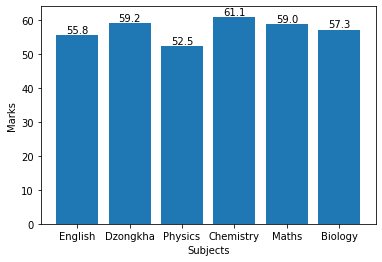

In [425]:
marks=[eng12,dzo12,phy12,che12,math12,bio12]
subject=['English','Dzongkha','Physics','Chemistry','Maths','Biology']
plt.bar(subject,marks)
for i in range(len(subject)):
  plt.text(i,marks[i],marks[i],ha="center",va="bottom")
plt.xlabel("Subjects")
plt.ylabel("Marks")
plt.show

Total performance of the Students

<function matplotlib.pyplot.show>

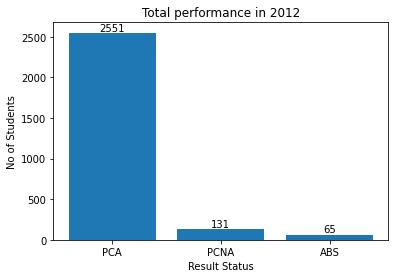

In [462]:
x = df12['RESULT'].unique()
y=df12['RESULT'].value_counts()
plt.bar(x,y)
for i in range(len(x)):
  plt.text(i,y[i],y[i],ha="center",va = "bottom")
plt.xlabel("Result Status")
plt.ylabel("No of Students")
plt.title("Total performance in 2012")
plt.show

#2013 Analysis

In [464]:
df13 = df.groupby('YEAR')
df13 = df13.get_group(2013)
df13.head()


,NAME,GENDER,YEAR,STREAM,RESULT,ENG,DZO,PHY,CHE,MATH,BIO
0,BASANT CHHETRI,M,2013,SCIENCE,PCA,62.0,25.0,46.0,50.0,20.0,44.0
1,BIK BAHADUR MONGAR,M,2013,SCIENCE,PCA,50.0,55.0,34.0,48.0,50.0,52.0
2,BIKASH NEPAL,M,2013,SCIENCE,PCA,55.0,55.0,62.0,69.0,90.0,NaN
3,BIR BDR. RAI,M,2013,SCIENCE,PCA,55.0,60.0,50.0,58.0,69.0,NaN
4,CHEKI DORJI,M,2013,SCIENCE,PCA,46.0,60.0,46.0,48.0,55.0,NaN


Marks obtained

In [465]:
eng13 = round(df13.ENG.mean(),1)
dzo13 = round(df13.DZO.mean(),1)
phy13 = round(df13.PHY.mean(),1)
che13 = round(df13.CHE.mean(),1)
math13 = round(df13.MATH.mean(),1)
bio13 = round(df13.BIO.mean(),1)


<function matplotlib.pyplot.show>

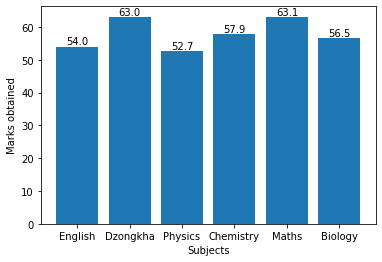

In [466]:
marks=[eng13,dzo13,phy13,che13,math13,bio13]
subject=['English','Dzongkha','Physics','Chemistry','Maths','Biology']
plt.bar(subject,marks)
for i in range(len(subject)):
  plt.text(i,marks[i],marks[i],ha="center",va="bottom")
plt.xlabel("Subjects")
plt.ylabel("Marks obtained")
plt.show

<function matplotlib.pyplot.show>

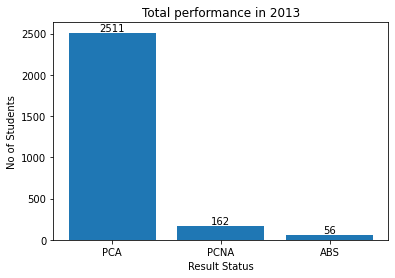

In [467]:
x = df13['RESULT'].unique()
y=df13['RESULT'].value_counts()
plt.bar(x,y)
for i in range(len(x)):
  plt.text(i,y[i],y[i],ha="center",va = "bottom")
plt.xlabel("Result Status")
plt.ylabel("No of Students")
plt.title("Total performance in 2013")
plt.show

#2014 Analysis

#2015 Analysis

In [429]:
df15 = df.groupby('YEAR')
df15 = df15.get_group(2015)
df15.head()

,NAME,GENDER,YEAR,STREAM,RESULT,ENG,DZO,PHY,CHE,MATH,BIO
536,AYUSH MISHRA,M,2015,SCIENCE,PCA,66.0,50.0,91.0,77.0,95.0,NaN
537,CHETEN TSHERING,M,2015,SCIENCE,PCA,60.0,65.0,78.0,50.0,52.0,NaN
538,CHIMI WANGCHUK,M,2015,SCIENCE,PCA,69.0,65.0,69.0,70.0,72.0,68.0
539,DIWASH CHHETRI,M,2015,SCIENCE,PCA,63.0,41.0,76.0,75.0,43.0,76.0
540,DORJEEY WANGCHUK,M,2015,SCIENCE,PCA,60.0,67.0,47.0,42.0,55.0,NaN


Marks obtained

In [430]:
eng15 = round(df15.ENG.mean(),1)
dzo15 = round(df15.DZO.mean(),1)
phy15 = round(df15.PHY.mean(),1)
che15 = round(df15.CHE.mean(),1)
math15 = round(df15.MATH.mean(),1)
bio15 = round(df15.BIO.mean(),1)


<function matplotlib.pyplot.show>

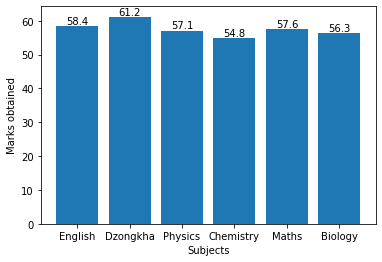

In [431]:
marks=[eng15,dzo15,phy15,che15,math15,bio15]
subject=['English','Dzongkha','Physics','Chemistry','Maths','Biology']
plt.bar(subject,marks)
for i in range(len(subject)):
  plt.text(i,marks[i],marks[i],ha="center",va="bottom")
plt.xlabel("Subjects")
plt.ylabel("Marks obtained")
plt.show

<function matplotlib.pyplot.show>

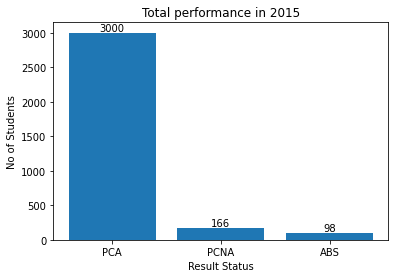

In [468]:
x = df15['RESULT'].unique()
y=df15['RESULT'].value_counts()
plt.bar(x,y)
for i in range(len(x)):
  plt.text(i,y[i],y[i],ha="center",va = "bottom")
plt.xlabel("Result Status")
plt.ylabel("No of Students")
plt.title("Total performance in 2015")
plt.show

#2016 Analysis

In [432]:
df16 = df.groupby('YEAR')
df16 = df16.get_group(2016)
df16.head()

,NAME,GENDER,YEAR,STREAM,RESULT,ENG,DZO,PHY,CHE,MATH,BIO
0,ARPAN MONGER,M,2016,SCIENCE,PCA,54.0,52.0,42.0,45.0,51.0,NaN
1,BIK RAM GURUNG,M,2016,SCIENCE,PCNA,50.0,54.0,47.0,35.0,22.0,NaN
2,BINOD KATEL,M,2016,SCIENCE,PCNA,45.0,41.0,43.0,31.0,35.0,NaN
3,KARMA TANDIN DORJI,M,2016,SCIENCE,PCA,55.0,56.0,67.0,57.0,70.0,NaN
4,KINLEY PENJOR,M,2016,SCIENCE,PCA,56.0,76.0,60.0,48.0,67.0,NaN


In [433]:
eng16 = round(df16.ENG.mean(),1)
dzo16 = round(df16.DZO.mean(),1)
phy16 = round(df16.PHY.mean(),1)
che16 = round(df16.CHE.mean(),1)
math16 = round(df16.MATH.mean(),1)
bio16 = round(df16.BIO.mean(),2)


<function matplotlib.pyplot.show>

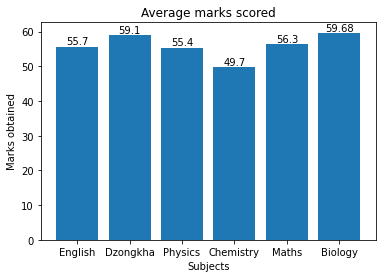

In [469]:
marks=[eng16,dzo16,phy16,che16,math16,bio16]
subject=['English','Dzongkha','Physics','Chemistry','Maths','Biology']
plt.bar(subject,marks)
for i in range(len(subject)):
  plt.text(i,marks[i],marks[i],ha="center",va="bottom")
plt.xlabel("Subjects")
plt.title("Average marks scored")
plt.ylabel("Marks obtained")
plt.show

<function matplotlib.pyplot.show>

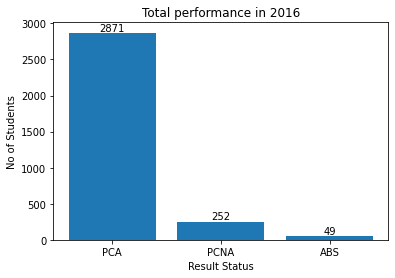

In [470]:
x = df16['RESULT'].unique()
y=df16['RESULT'].value_counts()
plt.bar(x,y)
for i in range(len(x)):
  plt.text(i,y[i],y[i],ha="center",va = "bottom")
plt.xlabel("Result Status")
plt.ylabel("No of Students")
plt.title("Total performance in 2016")
plt.show

#2017 Analysis

In [435]:
df17 = df.groupby('YEAR')
df17 = df17.get_group(2017)
df17.head()

,NAME,GENDER,YEAR,STREAM,RESULT,ENG,DZO,PHY,CHE,MATH,BIO
557,ABHINASH CHAMLING RAI,M,2017,SCIENCE,PCA,60.0,42.0,61.0,57.0,61.0,53.0
558,ANJAY KUMAR VERMA,M,2017,SCIENCE,PCA,61.0,NaN,50.0,47.0,46.0,NaN
559,DENASH GURUNG,M,2017,SCIENCE,PCA,62.0,65.0,59.0,56.0,44.0,NaN
560,DIPANSHU VATSA,M,2017,SCIENCE,PCA,70.0,NaN,64.0,56.0,77.0,NaN
561,JIGME TENZIN,M,2017,SCIENCE,PCA,56.0,61.0,62.0,57.0,58.0,66.0


In [436]:
eng17 = round(df17.ENG.mean(),1)
dzo17 = round(df17.DZO.mean(),1)
phy17 = round(df17.PHY.mean(),1)
che17 = round(df17.CHE.mean(),1)
math17 = round(df17.MATH.mean(),1)
bio17 = round(df17.BIO.mean(),1)


<function matplotlib.pyplot.show>

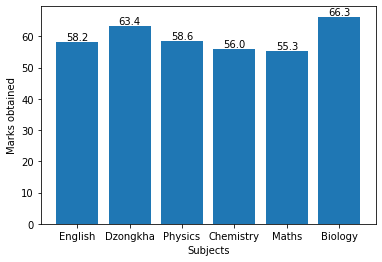

In [437]:
marks=[eng17,dzo17,phy17,che17,math17,bio17]
subject=['English','Dzongkha','Physics','Chemistry','Maths','Biology']
plt.bar(subject,marks)
for i in range(len(subject)):
  plt.text(i,marks[i],marks[i],ha="center",va="bottom")
plt.xlabel("Subjects")
plt.ylabel("Marks obtained")
plt.show

<function matplotlib.pyplot.show>

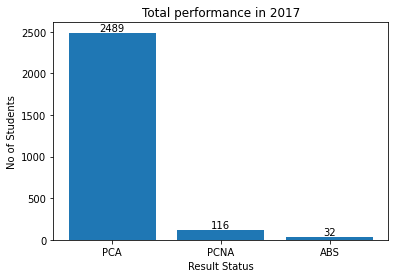

In [471]:
x = df17['RESULT'].unique()
y=df17['RESULT'].value_counts()
plt.bar(x,y)
for i in range(len(x)):
  plt.text(i,y[i],y[i],ha="center",va = "bottom")
plt.xlabel("Result Status")
plt.ylabel("No of Students")
plt.title("Total performance in 2017")
plt.show

#2018 Analysis

In [438]:
df18 = df.groupby('YEAR')
df18 = df18.get_group(2018)
df18.head()

,NAME,GENDER,YEAR,STREAM,RESULT,ENG,DZO,PHY,CHE,MATH,BIO
0,NGAWANG TENZIN,M,2018,SCIENCE,PCA,66.0,57.0,55.0,42.0,43.0,49.0
1,SONAM LODAY CHEYNOR,M,2018,SCIENCE,PCA,74.0,57.0,64.0,49.0,40.0,49.0
2,SRAWAN PRADHAN,M,2018,SCIENCE,PCA,75.0,57.0,86.0,64.0,91.0,NaN
3,TANDIN TSHEWANG,M,2018,SCIENCE,PCA,45.0,42.0,44.0,37.0,43.0,NaN
4,TASHI TOBGAY,M,2018,SCIENCE,PCA,57.0,62.0,59.0,41.0,50.0,64.0


In [439]:
eng18 = round(df18.ENG.mean(),1)
dzo18 = round(df18.DZO.mean(),1)
phy18 = round(df18.PHY.mean(),1)
che18 = round(df18.CHE.mean(),1)
math18 = round(df18.MATH.mean(),1)
bio18 = round(df18.BIO.mean(),1)


<function matplotlib.pyplot.show>

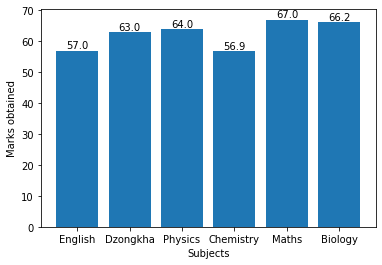

In [440]:
marks=[eng18,dzo18,phy18,che18,math18,bio18]
subject=['English','Dzongkha','Physics','Chemistry','Maths','Biology']
plt.bar(subject,marks)
for i in range(len(subject)):
  plt.text(i,marks[i],marks[i],ha="center",va="bottom")
plt.xlabel("Subjects")
plt.ylabel("Marks obtained")
plt.show

<function matplotlib.pyplot.show>

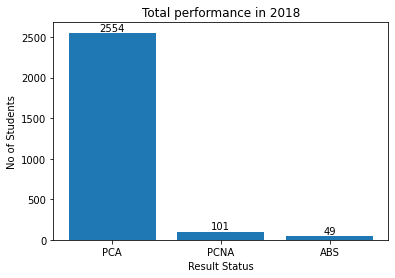

In [478]:
x = df18['RESULT'].unique()
y=df18['RESULT'].value_counts()
plt.bar(x,y)
for i in range(len(x)):
  plt.text(i,y[i],y[i],ha="center",va = "bottom")
plt.xlabel("Result Status")
plt.ylabel("No of Students")
plt.title("Total performance in 2018")
plt.show

#2019 Analysis

In [474]:
df19 = df.groupby('YEAR')
df19 = df19.get_group(2019)
df19.head()

,NAME,GENDER,YEAR,STREAM,RESULT,ENG,DZO,PHY,CHE,MATH,BIO
169,BIKASH GHALLEY,M,2019,SCIENCE,PCA,63.0,58.0,75.0,58.0,56.0,NaN
170,KUENZANG LHENDUP DORJI,M,2019,SCIENCE,ABS,NaN,NaN,NaN,NaN,NaN,NaN
171,NGEEDUP DHOJEE,M,2019,SCIENCE,PCA,70.0,65.0,57.0,59.0,59.0,76.0
172,NIMA,M,2019,SCIENCE,PCA,58.0,58.0,54.0,51.0,37.0,61.0
173,SHERAB THARCHEN DORJI,M,2019,SCIENCE,PCA,61.0,57.0,74.0,69.0,63.0,NaN


In [475]:
eng19 = round(df19.ENG.mean(),1)
dzo19 = round(df19.DZO.mean(),1)
phy19 = round(df19.PHY.mean(),1)
che19 = round(df19.CHE.mean(),1)
math19 = round(df19.MATH.mean(),1)
bio19 = round(df19.BIO.mean(),1)


<function matplotlib.pyplot.show>

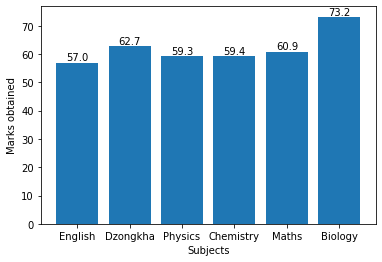

In [476]:
marks=[eng18,dzo19,phy19,che19,math19,bio19]
subject=['English','Dzongkha','Physics','Chemistry','Maths','Biology']
plt.bar(subject,marks)
for i in range(len(subject)):
  plt.text(i,marks[i],marks[i],ha="center",va="bottom")
plt.xlabel("Subjects")
plt.ylabel("Marks obtained")
plt.show

<function matplotlib.pyplot.show>

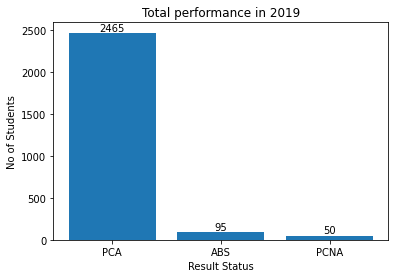

In [477]:
x = df19['RESULT'].unique()
y=df19['RESULT'].value_counts()
plt.bar(x,y)
for i in range(len(x)):
  plt.text(i,y[i],y[i],ha="center",va = "bottom")
plt.xlabel("Result Status")
plt.ylabel("No of Students")
plt.title("Total performance in 2019")
plt.show

#Graphing the average marks obtained in each subject over the years

In [480]:
x=[eng12,eng13,eng14,eng15,eng16,eng17,eng18,eng19]

NameError: ignored